# <u>manual_Report</u>
### 1. Introduction
### 2. Objective of project
### 3. Structure of Package
### 4. How to handle the system (run.py)
### 5. Example of analysis result
### 6. Wafer Analysis Graph

--------------------------------------------------------
--------------------------------------------------------

# 1. Introduction

+ The Program Engineering 2 : Team Project to make analysis package
+ Team B1
    * Kim Kang Seok - dlfrb789@hanyang.ac.kr
    * Song jun su - sb020578@hanyang.ac.kr
    * Choi il-gyu - dlfrb789@hanyang.ac.kr

# 2. Objective of project

Analysing the data in xml files and show the contents to <u>csv file</u> and <u>graphs plotting data</u>(_I-V graph, transmission-wavelength graph_)

# 3. Structure of Package

+ doc : .gitignore and README.md(explaining how to use our package)
+ src 
    - error : find the error(out to standard)
    - extract : bring the wafer name, experiment date, TestSiteinfo, wavelength
    - filter : filter the unuseful xml file
    - fitting : fit and show the approximation from IV graph and transmission spectra-wavelngth graph
    - get_result : make the dataframe and stored by csv file and images
    - i_none : the current value at -1V on IV graph
    - i_one : the current value at 1V on IV graph
    - iv : plot the graph of I-V relation
    - plot : plot the graph from extracted data(ex..I-V graph, transmission spectra-wavelength graph)
    - png_signal : If there is no png file, we can't make Hyperlink, so we need to know the existence of png files
    - reference : plot reference and fitting graph
    - rsq_fit : R Square value of Current data and Voltage data
    - rsq_ref : R Square value of transmission and 7th wavelength
    - search : search and show the specific png file
    - selection : select specific wafers and dies
    - transmission_measured : plot wavelength sweap graph
    - transmission_processed : plot flatten wavelength sweap graph
+ run.py : main program

# 4. How to use the system (run.py)

<img src ="B1_4.jpg" alt = "" style = "width:500px">

### 1. When you want to save the graph you want to see as a picture.

1. If you run the "run.py" program, you can see a window to select Wafer, Row, and Column. Wafer, Row, and Column are available for multiple choices. If you want to check what you have chosen, you can click the 'check' button. Then you can check the information on the bottom left.

2. You can save the desired graph as a picture with information from your chosen Wafer, Row, and Column. You can save 4 graphs separately. If you want to see a picture of four graphs at the same time, you have to click on the 'All' button. And press the 'Plot' button. Pictures can be found in the results file at png_files.

The name of each graph is stored as follows.

IV - fitting　　　　　　　　　　　　　: Analysis_{Wafer}_({Row},{Column})_{Date}_{TestSite}_iv.png

Transmission spectra - as measured　: Analysis_{Wafer}_({Row},{Column})_{Date}_{TestSite}_measured.png

Transmission spectra - as processed　: Analysis_{Wafer}_({Row},{Column})_{Date}_{TestSite}_processed.png

Reference fitting　　　　　　　　　　:Analysis_{Wafer}_({Row},{Column})_{Date}_{TestSite}_reference.png

All　　　　　　　　　　　　　　　　:Analysis_{Wafer}_({Row},{Column})_{Date}_{TestSite}.png

### 2. When you want to see one particular graph for a while.

If you click the 'Search' button, a program like the one below can run.
<img src ="B1_5.jpg" alt = "" style = "width:300px">
You can choose Wafer, Row, Column as you did before. If you click the graph you want to see and press the 'Show' button, you can check the graph. What's important here isn't saved as a photo.

### 3. Remaining Additional Features

1. If you click the "Delete_png" button, all files in "png_files" will be deleted.

2. When the 'xlsx' button is clicked, all the information in the xml file in the data file is stored in xlsx. If you want to check xlsx, you can check 'xlsx_file'.

3. Click the 'Quit' button to exit the program.


# 5. Example of analysis result
<img src ="B1_1.png" alt = "" style = "width:500px">
The above is a graph of the data information from the xml file that is defined under the conditions 'Wafer : D07, Row : 0, Column : 0'. Using the methods described above, each graph can be viewed separately.

<img src ="B1_2.png" alt = "" style = "width:500px">
In this way, a large amount of data can be saved as a photo.

<img src ="B1_3.png" alt = "" style = "width:500px">
The picture above shows all the information in the xml file in the data file.

# 6. Wafer Analysis Graph

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df_train = pd.read_excel('../results/xlsx_file/Analysis_B1.xlsx')

Text(0.5, 1.0, 'ErrorFlag-swarm')

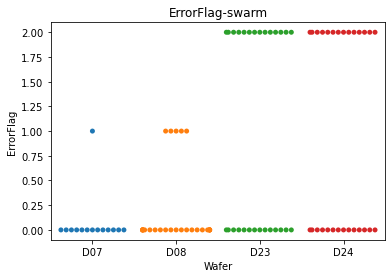

In [4]:
sns.swarmplot(x = 'Wafer', y = 'ErrorFlag', data = df_train)
plt.title('ErrorFlag-swarm')

Text(0.5, 1.0, 'Analysis Wavelength - swarm')

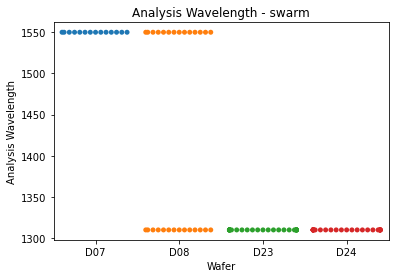

In [5]:
sns.swarmplot(x = 'Wafer', y = 'Analysis Wavelength', data = df_train)
plt.title('Analysis Wavelength - swarm')

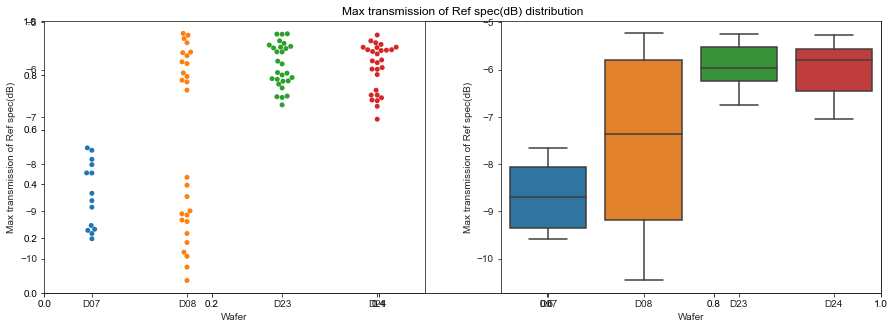

In [6]:
fig = plt.figure(figsize = (15, 5))
plt.title('Max transmission of Ref spec(dB) distribution')
sns.set_style('ticks')

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.swarmplot(x = 'Wafer', y = 'Max transmission of Ref spec(dB)', data = df_train, ax = area01)
sns.boxplot(x = 'Wafer', y = 'Max transmission of Ref spec(dB)', data = df_train, ax = area02)

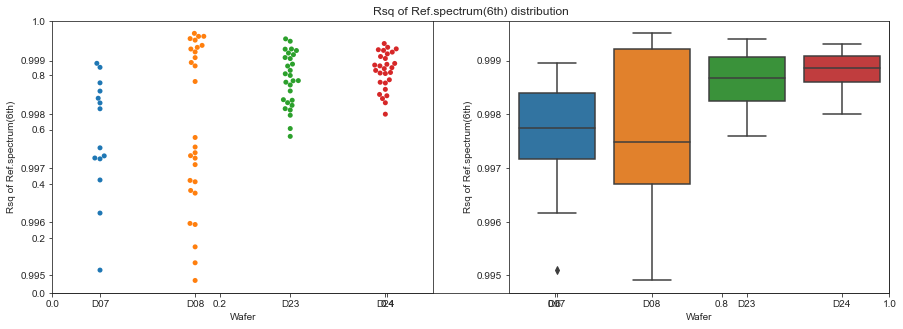

In [7]:
fig = plt.figure(figsize = (15, 5))
plt.title('Rsq of Ref.spectrum(6th) distribution')
sns.set_style('ticks')

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.swarmplot(x = 'Wafer', y = 'Rsq of Ref.spectrum(6th)', data = df_train, ax = area01)
sns.boxplot(x = 'Wafer', y = 'Rsq of Ref.spectrum(6th)', data = df_train, ax = area02)

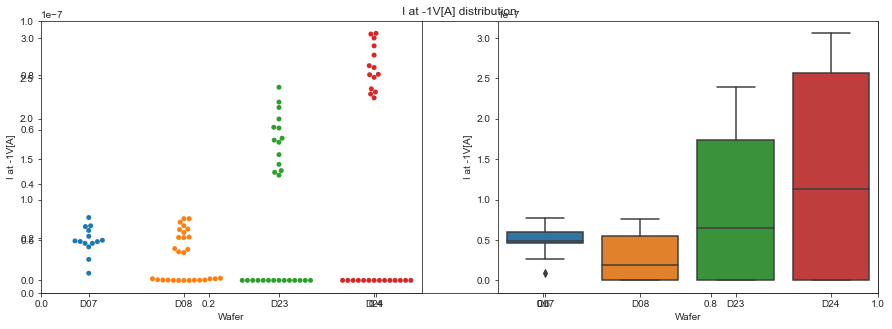

In [8]:
fig = plt.figure(figsize = (15, 5))
plt.title('I at -1V[A] distribution')
sns.set_style('ticks')

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.swarmplot(x = 'Wafer', y = 'I at -1V[A]', data = df_train, ax = area01)
sns.boxplot(x = 'Wafer', y = 'I at -1V[A]', data = df_train, ax = area02)

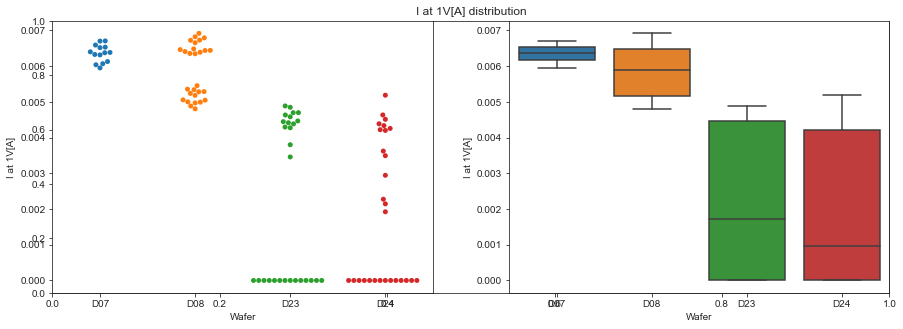

In [9]:
fig = plt.figure(figsize = (15, 5))
plt.title('I at 1V[A] distribution')
sns.set_style('ticks')

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.swarmplot(x = 'Wafer', y = 'I at 1V[A]', data = df_train, ax = area01)
sns.boxplot(x = 'Wafer', y = 'I at 1V[A]', data = df_train, ax = area02)